In [1]:
Agenda = {
    1:"Import what I want",
    2:"create the data",
    3:"Built the model",
    4:"Creat the loop for trainig and testin model",
    5:"Metrics evaluation"
}
Agenda

{1: 'Import what I want',
 2: 'create the data',
 3: 'Built the model',
 4: 'Creat the loop for trainig and testin model',
 5: 'Metrics evaluation'}

## 1. Import what I want

In [2]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

## 2. create data 

In [3]:
# set hyperparameter 
num_class = 4
num_features = 2
random_seed = 42

# 1. create multi class data
x , y = make_blobs(n_samples = 1000 ,
                  n_features = num_features ,
                  centers = num_class ,
                  cluster_std = 1.5 , # the distribution of the data
                  random_state = random_seed)


In [4]:
x.shape , y.shape

((1000, 2), (1000,))

In [5]:
# we use torch and torch deal with tensors so i will convert the data into tensor
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

print(x[:5] , y[:5])

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


In [6]:
# check the uniqe numbers in data
torch.unique(y)

tensor([0, 1, 2, 3])

In [7]:
# split the data
x_train , x_test , y_train , y_test = train_test_split(x,y,
                                                      test_size = 0.2,
                                                      random_state = random_seed)

In [8]:
x_train.shape , y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

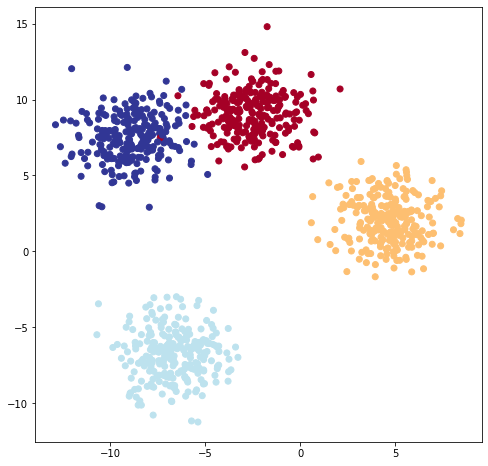

In [9]:
# plot data
plt.figure(figsize = (8,8))
plt.scatter(x[:,0] , x[:,1] , c = y , cmap = plt.cm.RdYlBu)

In [10]:
# check the device 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 3. Built the model

In [11]:
from torch import nn

# create the main class

class multi_class_modelv0(nn.Module):
    def __init__(self , input_features , output_features , hidden_units = 8): # constractor and some inputs
        super().__init__()
        
        # lets tey another way to stack layers
        # it is sequential mehtod
        self.linear_layer = nn.Sequential(
            nn.Linear(in_features = input_features , out_features = hidden_units),
            nn.Linear(in_features = hidden_units , out_features = hidden_units),
            nn.Linear(in_features = hidden_units , out_features = output_features),
        )
        
    # define the forward method 
    def forward(self , x : torch.Tensor) -> torch.Tensor :
        return self.linear_layer(x)

In [12]:
# create an object 
model_0 = multi_class_modelv0(input_features = num_features , 
                             output_features = num_class ,
                             hidden_units = 8)

model_0

multi_class_modelv0(
  (linear_layer): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

## 3.1 some notation

In [13]:
list(model_0.parameters())

[Parameter containing:
 tensor([[-0.6050, -0.4131],
         [-0.6560,  0.2716],
         [-0.5095, -0.2256],
         [-0.1368,  0.5646],
         [-0.5071, -0.0085],
         [-0.4976, -0.5291],
         [ 0.6900,  0.0253],
         [-0.3603,  0.1836]], requires_grad=True),
 Parameter containing:
 tensor([-0.5095,  0.4357,  0.0587,  0.5327, -0.4555, -0.6017,  0.3016,  0.1991],
        requires_grad=True),
 Parameter containing:
 tensor([[-0.0043, -0.2186,  0.0979,  0.1195, -0.3470, -0.1583,  0.2996,  0.2435],
         [-0.3310,  0.0962, -0.3005, -0.1662,  0.1079, -0.0966, -0.2775,  0.2046],
         [-0.0328, -0.2663,  0.1993, -0.3394,  0.2227,  0.3240,  0.0109,  0.0499],
         [-0.1499, -0.0004,  0.0031, -0.2797,  0.1354, -0.2682,  0.2303, -0.3213],
         [-0.2813,  0.1406, -0.1106,  0.0179,  0.0761,  0.0918,  0.0578, -0.3249],
         [-0.0332,  0.2178,  0.2029, -0.1428, -0.2842, -0.2631, -0.0791, -0.3169],
         [-0.2108, -0.1597, -0.3325,  0.1637,  0.1521,  0.0896,  0.2

In [14]:
# creating the loss function and optimizer
loss_fun = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model_0.parameters() , 
                           lr = 0.01)

In [15]:
# define the accuracy function
def accuracy(y_true , y_pred):
    correct = torch.eq(y_true , y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [16]:
model_0(x_train)[:5]

tensor([[ 1.6896, -0.4301, -0.0929, -0.6422],
        [ 0.0544, -0.5117, -1.6334,  1.6293],
        [-1.7302,  1.6659, -0.8312,  1.5628],
        [-1.0480,  1.0565, -0.8934,  1.3377],
        [-0.1632, -0.2422, -1.5312,  1.6167]], grad_fn=<SliceBackward0>)

In [17]:
# now how many elements in a single prediction sample
model_0(x_train)[0].shape , num_class

(torch.Size([4]), 4)

In [18]:
# the first step in prediction
# it is predict logits 
y_logits = model_0(x_test)

# perform softmax to get probability of predictions 
y_pred_prob = torch.softmax(y_logits , dim = 1)
print(y_logits[:5])
print(y_pred_prob[:5])

tensor([[ 1.6298, -0.5182, -0.2425, -0.4634],
        [-1.2494,  0.1030, -2.1168,  2.6770],
        [-1.1838,  1.4017, -0.6358,  1.1312],
        [ 1.3273, -0.1344, -0.0905, -0.4911],
        [ 0.6442, -0.7400, -1.3601,  1.0994]], grad_fn=<SliceBackward0>)
tensor([[0.7175, 0.0837, 0.1103, 0.0885],
        [0.0179, 0.0690, 0.0075, 0.9056],
        [0.0383, 0.5079, 0.0662, 0.3876],
        [0.6111, 0.1417, 0.1480, 0.0992],
        [0.3376, 0.0846, 0.0455, 0.5323]], grad_fn=<SliceBackward0>)


In [19]:
# to show that it is a probability
torch.sum(y_pred_prob[0])

tensor(1., grad_fn=<SumBackward0>)

In [20]:
# test the most in one sample of prediction
print(y_pred_prob[0])

print(f"The index of the max numbers in the sample is = {torch.argmax(y_pred_prob[0])}")

tensor([0.7175, 0.0837, 0.1103, 0.0885], grad_fn=<SelectBackward0>)
The index of the max numbers in the sample is = 0


## 4. Creat the loop for trainig and testin model

In [21]:
# rnadom seed
torch.manual_seed(random_seed)

# set the number of epochs
epochs = 100

# loop
for epoch in range(epochs):
    
    # train hte model 
    model_0.train()
    
    # forward pass
    y_logits = model_0(x_train)
    y_pred = torch.softmax(y_logits , dim = 1).argmax(dim = 1)
    
    # calculate the loss 
    loss = loss_fun(y_logits , y_train)
    acc = accuracy(y_true = y_train ,
                  y_pred = y_pred)
    
    # optimize zero grad
    optimizer.zero_grad()
    
    # backwards
    loss.backward()
    
    # optimizer step
    optimizer.step()
    
    ### testing 
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(x_test)
        test_pred = torch.softmax(test_logits , dim = 1).argmax(dim = 1)
        
        test_loss = loss_fun(test_logits , y_test)
        test_acc = accuracy(y_true = y_test , 
                           y_pred = test_pred)
        
    # print what happen
    if epoch % 10 == 0:
        print(f"epoch:{epoch} | loss:{loss:.2f} | acc:{acc:.2f} | test loss {test_loss:.2f} | test acc:{test_acc:.2f}")

epoch:0 | loss:1.80 | acc:24.62 | test loss 1.50 | test acc:29.00
epoch:10 | loss:0.72 | acc:54.00 | test loss 0.63 | test acc:62.00
epoch:20 | loss:0.49 | acc:91.75 | test loss 0.45 | test acc:95.00
epoch:30 | loss:0.38 | acc:98.12 | test loss 0.36 | test acc:98.50
epoch:40 | loss:0.32 | acc:98.75 | test loss 0.31 | test acc:100.00
epoch:50 | loss:0.27 | acc:98.88 | test loss 0.26 | test acc:100.00
epoch:60 | loss:0.23 | acc:99.12 | test loss 0.23 | test acc:100.00
epoch:70 | loss:0.21 | acc:99.25 | test loss 0.20 | test acc:100.00
epoch:80 | loss:0.19 | acc:99.25 | test loss 0.18 | test acc:99.50
epoch:90 | loss:0.17 | acc:99.25 | test loss 0.16 | test acc:99.50


## 4.1 Evaluate the model

In [22]:
# make prediction
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(x_test)
    
y_logits[:10]

tensor([[ 3.7923,  5.6624, -4.7912, -1.0183],
        [ 0.3179, -5.2880, -1.6480,  2.2092],
        [-4.0775, -6.3134,  5.3989,  1.5660],
        [ 2.3416,  4.2024, -2.7338, -0.8173],
        [ 4.0836,  2.3358, -6.0708,  0.2750],
        [ 0.0555, -6.6961, -1.5498,  2.6670],
        [-3.7024, -4.7817,  5.1433,  1.0888],
        [ 3.0140,  0.3142, -4.7802,  0.7714],
        [-4.9567, -8.8889,  6.2410,  2.3107],
        [ 3.3553,  1.0482, -5.1707,  0.5803]])

In [23]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_test[:10]}")
print(f"Test accuracy: {accuracy(y_true=y_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 99.5%


In [24]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

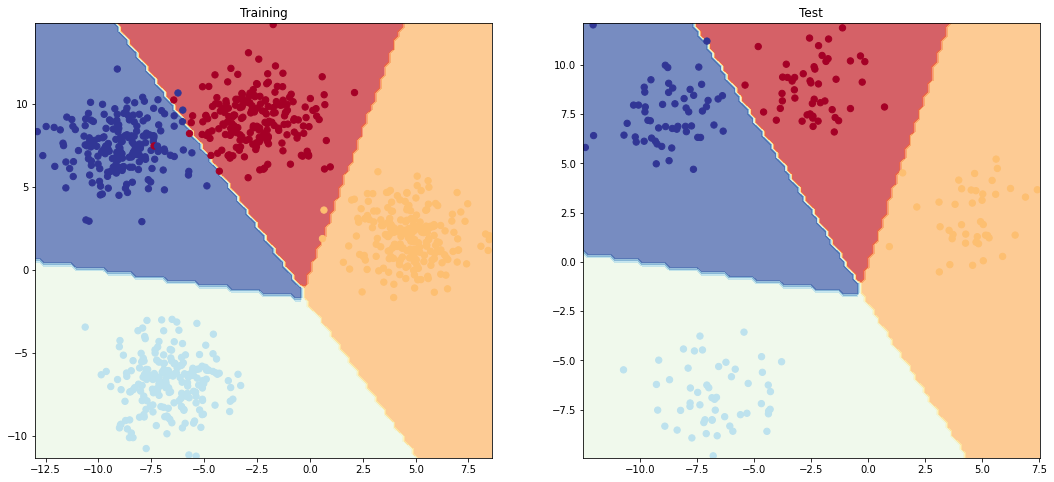

In [25]:
plt.figure(figsize = (18,8))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_0 , x_train , y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0 , x_test , y_test)

## 5. Metrics evaluation 

In [29]:
!pip -q install torchmetrics

In [36]:
from torchmetrics import Accuracy

acc = Accuracy()

print(f"The accuracy of the model is:{acc(y_preds , y_test)}")

The accuracy of the model is:0.9950000047683716


**I will stop now and comeback in different notebook**

**thanks torch doc**